In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

In [2]:
lista_alumnos = [("Leonardo S", 24, 1.82), 
                 ("Piero T", 25, 1.71), 
                 ("Marta B", 35, 1.66), 
                 ("Silvia P", 37, 1.63), 
                 ("Faro Z", 29, 1.90), 
                 ("Miguel N", 27, 1.80), 
                 ("Alejandro M", 28, 1.70), 
                 ("Cristina M", 32, 1.60), 
                 ("Francisco P", 36, 1.74), 
                 ("Jorge D", 45, 1.72), 
                 ("Jesús L", 41, 1.65), 
                 ("Marta G", 30, 1.65), 
                 ("Jennifer S", 40, 1.60), 
                 ("Diego I", 39, 1.80), 
                 ("Antonio C", 23, 1.77), 
                 ("Juan M", 32, 1.75), 
                 ("David S", 27, 1.70), 
                 ("Antonio J", 34, 1.80), 
                 ("Carlos H", 27, 1.77), 
                 ("Erik U", 28, 1.70), 
                 ("Marcos L", 35, 1.80)] 

### ¿Es una buena técnica para este tipo de problemas? Demuéstralo antes de entrenar un modelo con un análisis descriptivo.

In [3]:
df = pd.DataFrame(lista_alumnos, columns=['Nombre','Edad','Altura'])
df

,Nombre,Edad,Altura
0,Leonardo S,24,1.82
1,Piero T,25,1.71
2,Marta B,35,1.66
3,Silvia P,37,1.63
4,Faro Z,29,1.90
5,Miguel N,27,1.80
6,Alejandro M,28,1.70
7,Cristina M,32,1.60
8,Francisco P,36,1.74
9,Jorge D,45,1.72


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nombre  21 non-null     object 
 1   Edad    21 non-null     int64  
 2   Altura  21 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 636.0+ bytes


In [5]:
df.describe()

,Edad,Altura
count,21.000000,21.000000
mean,32.095238,1.727143
std,6.081980,0.079003
min,23.000000,1.600000
25%,27.000000,1.660000
50%,32.000000,1.720000
75%,36.000000,1.800000
max,45.000000,1.900000


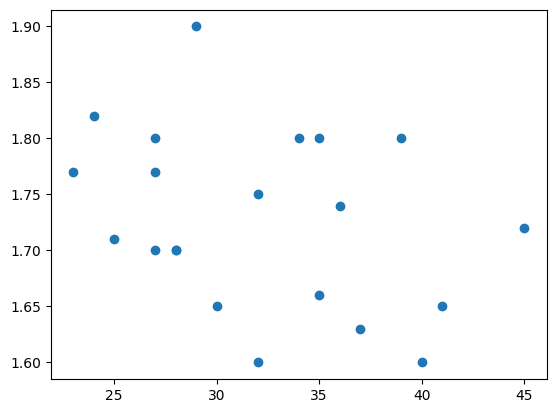

In [6]:
plt.scatter(df['Edad'], df['Altura'])

<Axes: xlabel='Edad', ylabel='Altura'>

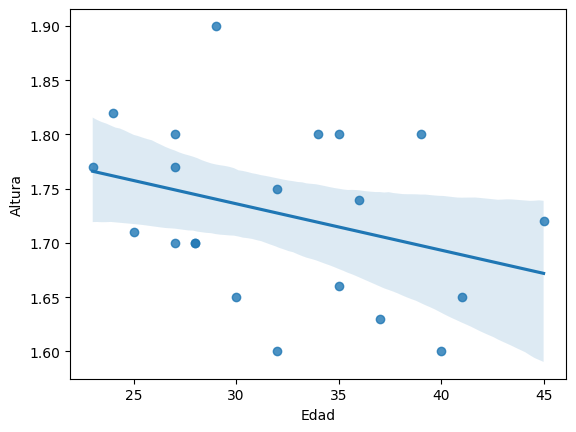

In [7]:
sns.regplot(x=df['Edad'], y=df['Altura'])

<Axes: >

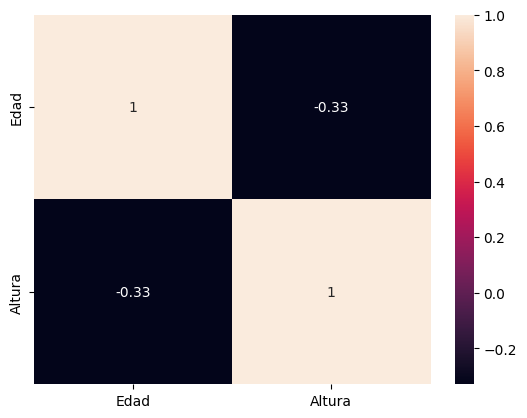

In [8]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

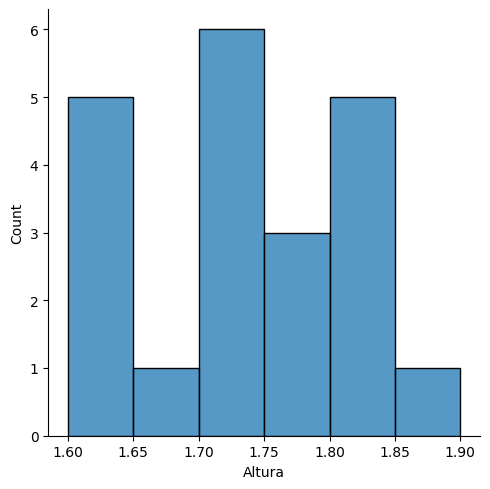

In [9]:
sns.displot(df['Altura'])

### Entrena un modelo de regresión lineal

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
X = df[['Edad']]
y = df['Altura']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16, 1)
(5, 1)
(16,)
(5,)


y = a + b*x

altura = a + b*Edad

In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [14]:
lr.intercept_

1.9428809062149202

In [15]:
lr.coef_

array([-0.00690785])

altura = 1.94 - 0.007 * Edad

In [16]:
altura = 1.94 - 0.007 * 30
print(altura)

1.73


In [19]:
lr.predict([[30], [36]])

c:\Users\Miguel Angel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.73564547, 1.69419839])

### ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo de forma manual con python. Aparte, usa las métricas de sklearn MAE, MAPE, MSE y el RMSE.

In [20]:
y_pred = lr.predict(X_test)
y_pred

array([1.69419839, 1.67347484, 1.70110624, 1.77018471, 1.73564547])

In [24]:
df_eval = pd.DataFrame(X_test)
df_eval['prediccion'] = y_pred
df_eval['valor_real'] = y_test
df_eval['error'] = abs(df_eval['prediccion'] - df_eval['valor_real'])
df_eval['error_cuad'] = df_eval['error'] ** 2
df_eval

,Edad,prediccion,valor_real,error,error_cuad
8,36,1.694198,1.74,0.045802,0.002098
13,39,1.673475,1.80,0.126525,0.016009
20,35,1.701106,1.80,0.098894,0.009780
1,25,1.770185,1.71,0.060185,0.003622
11,30,1.735645,1.65,0.085645,0.007335


In [25]:
df_eval['error'].mean() # MAE

0.08341014389223393

In [32]:
print(df_eval['error_cuad'].mean()) # MSE
print(df_eval['error_cuad'].mean() ** (1/2)) # RMSE

0.00776874525279269
0.08814048588924779


In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", mean_squared_error(y_test, y_pred) ** (1/2))

MAE 0.08341014389223393
MAPE 0.047731517116659405
MSE 0.00776874525279269
RMSE 0.08814048588924779


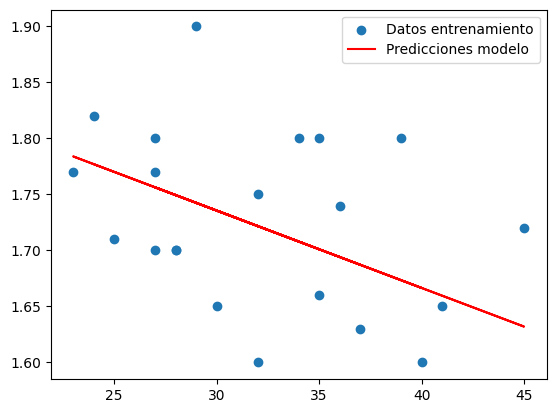

In [37]:
plt.scatter(df['Edad'], df['Altura'], label="Datos entrenamiento")
plt.plot(df['Edad'], lr.predict(X), color='r', label="Predicciones modelo")
plt.legend()